In [78]:
import os
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns   
import sklearn as sk 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [79]:
sns.set_theme(style="darkgrid")

### Leer archivos csv y agregarlos en un diccionario

Se organiza de tal manera de que de un diccionario tenga <br>
```python
dfs = {nombre_archivo1:{dataframe1} , nombre_archivo2:{dataframe2} , ... , nombre_archivo_n:{dataframe_n} }
```


In [81]:
path = "archivos"
dfs = {}
for file in os.scandir(path):
    if file.is_file() and file.name.endswith('.csv'):
        name = os.path.splitext(file.name)[0]  
        dfs[name] = pd.read_csv(file).drop(columns='Unnamed: 0')
        

### Hacemos una pequenia limpieza de datos
##### Eliminamos alguna columna grupo que es nula y filas que tienen datos nulos

In [83]:
for name, df in dfs.items():
    df.dropna(axis='columns', how = 'all',inplace=True)
    df.dropna(axis='rows', how = 'any',inplace=True)
    df.reset_index(drop=True, inplace=True)
    if 'random' in name.lower():
        df['Real'] = 0
    else:
        df['Real'] = 1    

In [43]:
dfs_Randoms = {}
dfs_Real = {}

for name, df in dfs.items():
    # si el nombre del archivo contiene 'RANDOM',  y agregar una columna de clasificacion, si es una pareja random con 0 y 1 
    if 'RANDOM' in name: 
        dfs_Randoms[name] = df
    else:
        dfs_Real[name] = df
# Imprimir los nombres de los DataFrames
print("DataFrames con 'RANDOM':", list(dfs_Randoms.keys()))
print("DataFrames sin 'Real':", list(dfs_Real.keys()))

DataFrames con 'RANDOM': ['CORR-RANDOM_OA', 'CORR-RANDOM_OC', 'CORR-RANDOM_EX']
DataFrames sin 'Real': ['CORR_EX', 'CORR_OC', 'CORR_OA']


Empezamos a hacer modelos para los todos los datos juntos

In [74]:
dfs_total_Random = pd.concat(dfs_Randoms.values(), ignore_index=True)
dfs_total_Random = dfs_total_Random.sample(frac=1, random_state=1984).reset_index(drop=True)
#display(dfs_total_Random)

df_Random = dfs_total_Random.iloc[:len(dfs_total_Random)//4]  
#display(df_Random)

In [ ]:

#df_total = pd.concat(list(dfs_Randoms.values()) + list(dfs_Real.values()) , ignore_index=True)

df_total = pd.concat([df_Random] + list(dfs_Real.values()), ignore_index=True)
#display(df_total)
display(df_total)
y = df_total['Real']
X = df_total.drop(columns=['Real','Tipo','Condicion','Banda','Participantes','Grupo'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


logistic_model = LogisticRegression()

,Participantes,Condicion,Banda,Tipo,Fp1_A-F3_B,Fp1_A-C3_B,Fp1_A-O1_B,Fp1_A-F7_B,Fp1_A-T3_B,Fp1_A-T5_B,...,C4_A-T4_B,C4_A-T6_B,O2_A-F8_B,O2_A-T4_B,O2_A-T6_B,F8_A-T4_B,F8_A-T6_B,T4_A-T6_B,Real,Grupo
0,P45AP06A,OA,DL,RNG,-0.095708,-0.121424,-0.259758,0.153414,-0.072931,-0.233470,...,-0.236282,0.127801,-0.099905,-0.207643,0.201685,0.170464,-0.007284,0.171400,0,NaN
1,P49AP05B,OC,BT,RNG,0.019580,0.074928,0.024767,0.036548,0.022615,0.011710,...,0.076947,0.041179,0.036712,0.037146,-0.008269,0.057509,0.025608,0.046408,0,NaN
2,P23BP12A,OA,AL1,RNG,-0.008497,0.010717,0.031984,0.060756,0.088743,0.039762,...,-0.059048,-0.093247,0.043968,-0.015890,-0.067589,-0.072553,0.011719,-0.036132,0,NaN
3,P30AP29A,EX,GM,RNG,0.036709,-0.064211,0.031244,-0.008742,0.011442,0.029332,...,-0.004458,0.009369,0.021101,-0.022216,-0.019958,0.022569,0.079079,0.014921,0,NaN
4,P45AP06A,EX,AL1,RNG,-0.012331,-0.063642,-0.037821,-0.130401,-0.027398,-0.075162,...,0.051476,0.030653,-0.060470,-0.063573,-0.021255,0.096403,0.129572,-0.022545,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2057,P49,OA,AL1,OR,-0.042097,-0.066911,-0.085687,0.061227,-0.077653,-0.076327,...,0.011351,0.032250,-0.033337,-0.016969,-0.093557,-0.104217,0.035904,0.019803,1,1CN
2058,P49,OA,AL2,OR,-0.017270,-0.069299,-0.045423,-0.040078,-0.108024,-0.033801,...,0.029906,-0.034814,0.063559,0.013025,-0.025992,-0.010832,-0.022447,-0.117860,1,1CN
2059,P49,OA,BB,OR,-0.026278,-0.012195,-0.052421,0.057179,-0.057375,-0.088535,...,0.034840,0.028286,-0.057218,0.004108,0.002042,0.002714,0.021608,0.067636,1,1CN
2060,P49,OA,BT,OR,0.012573,0.034273,-0.034346,0.047830,0.028937,-0.035626,...,-0.013672,0.035719,-0.040003,0.030136,0.014643,-0.001492,0.047521,0.059091,1,1CN


Exactitud: 0.48184019370460046
Matriz de Confusion :
 [[178  40]
 [174  21]]
cross val score: [0.45520581 0.46489104 0.51699029 0.51213592 0.5631068 ]


Text(66.25, 0.5, 'Actual')

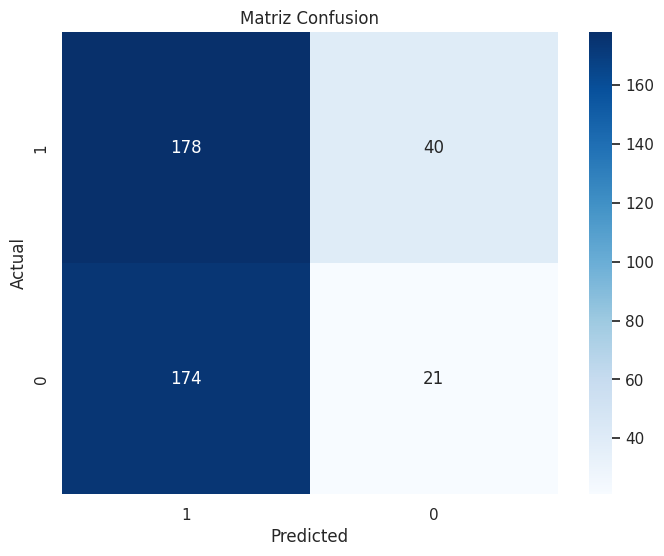

In [109]:
from sklearn.model_selection import cross_val_score

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print("Exactitud:", accuracy_score(y_test, y_pred))
print("Matriz de Confusion :\n", confusion_matrix(y_test, y_pred))
print(f"cross val score: {cross_val_score(logistic_model, X, y, cv=5)}")

# Visualizar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['1', '0'], yticklabels=['1', '0']) # verificar las etiquetas
plt.title('Matriz Confusion')
plt.xlabel('Predicted')
plt.ylabel('Actual')

### Armar modelos de regresión logística para cada Banda


Banda: DL
Accuracy: 0.4423076923076923
cross val score: 0.502262443438914


Banda: BT
Accuracy: 0.43103448275862066
cross val score: 0.4776164549304294


Banda: AL1
Accuracy: 0.43636363636363634
cross val score: 0.45259259259259255


Banda: GM
Accuracy: 0.38181818181818183
cross val score: 0.4762962962962963


Banda: AL2
Accuracy: 0.4230769230769231
cross val score: 0.4226998491704374


Banda: TH
Accuracy: 0.66
cross val score: 0.5885714285714285


Banda: GM2
Accuracy: 0.6170212765957447
cross val score: 0.5836262719703977


Banda: BB
Accuracy: 0.6521739130434783
cross val score: 0.6025120772946859




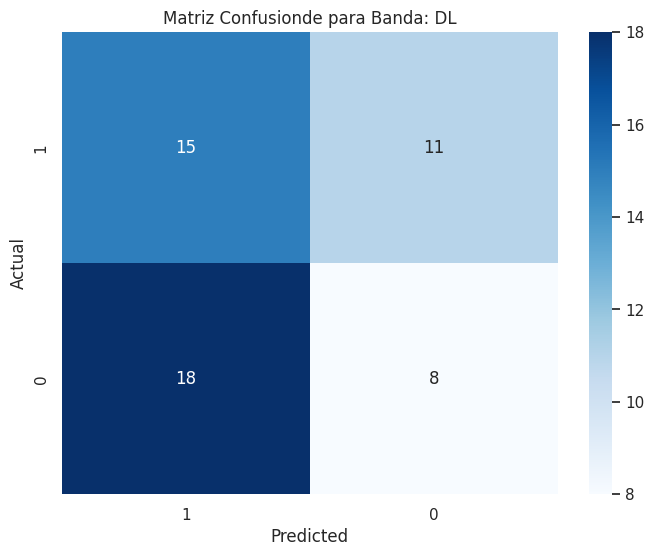

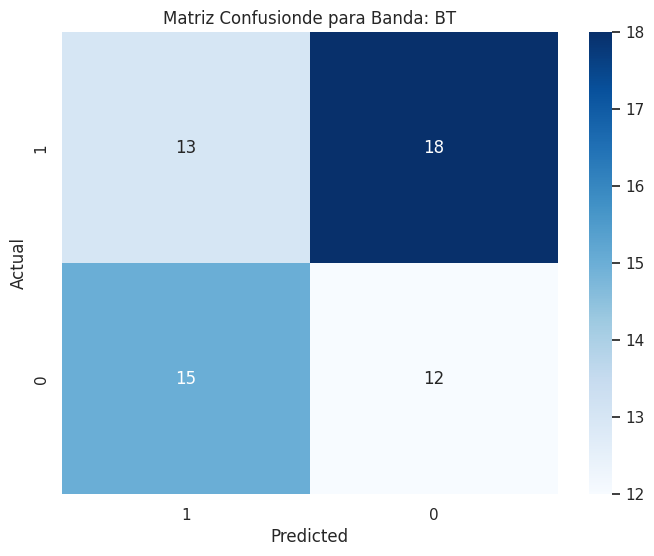

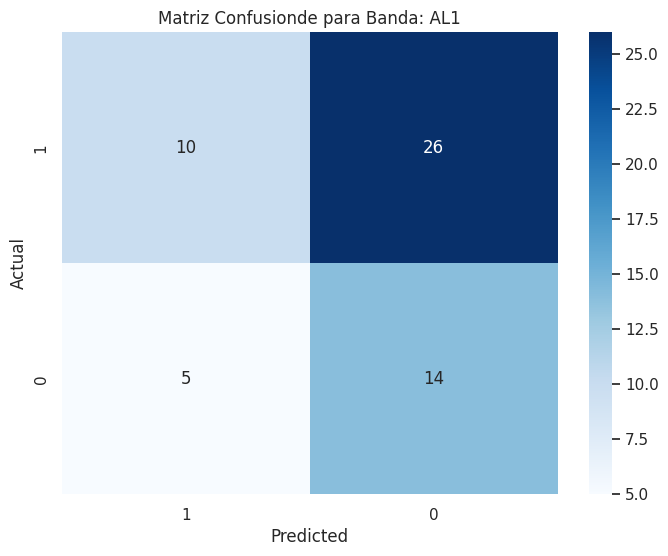

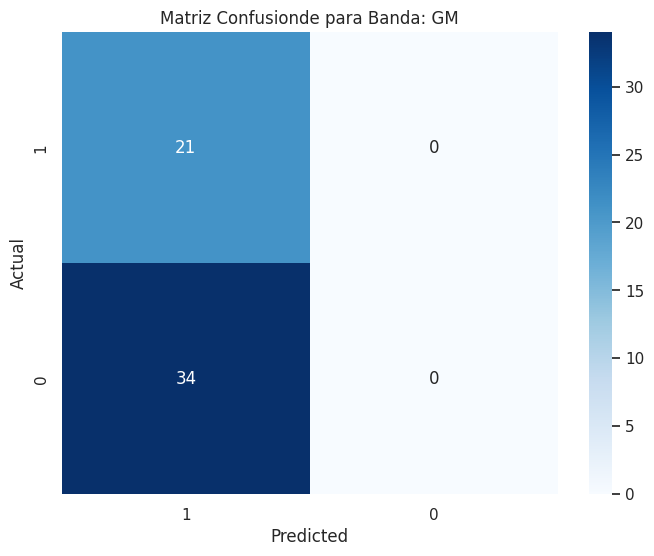

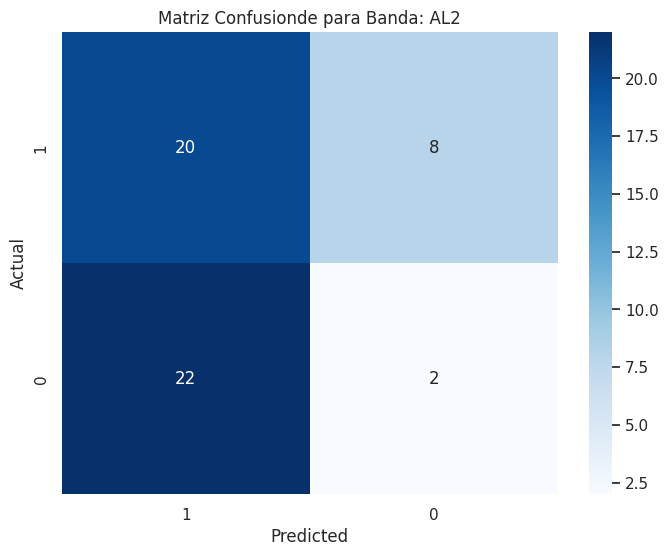

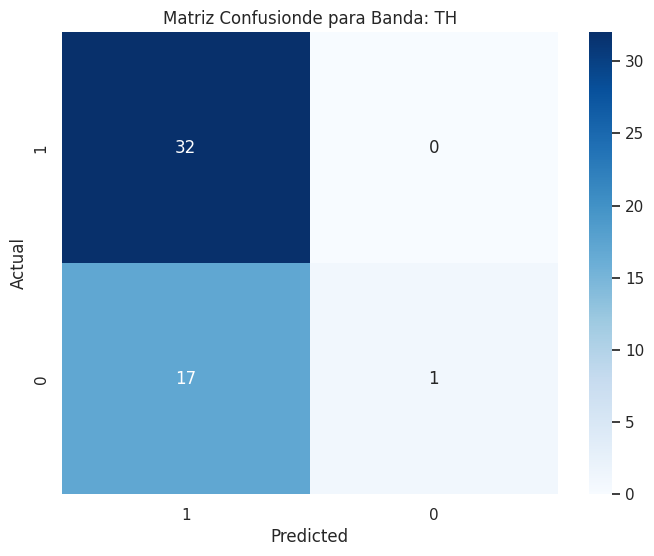

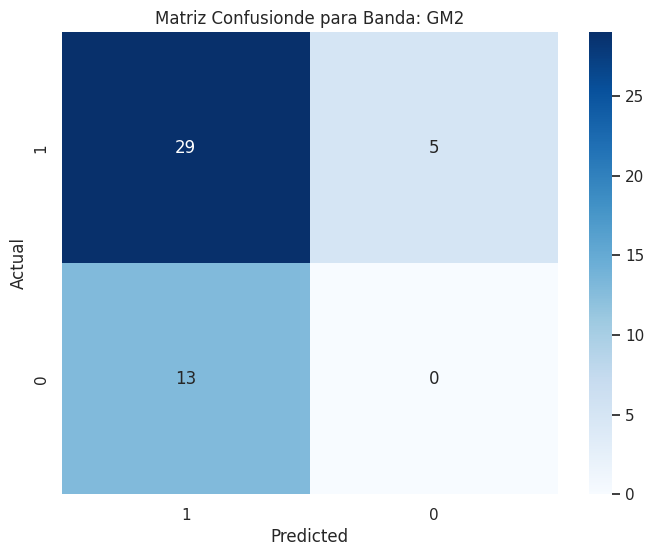

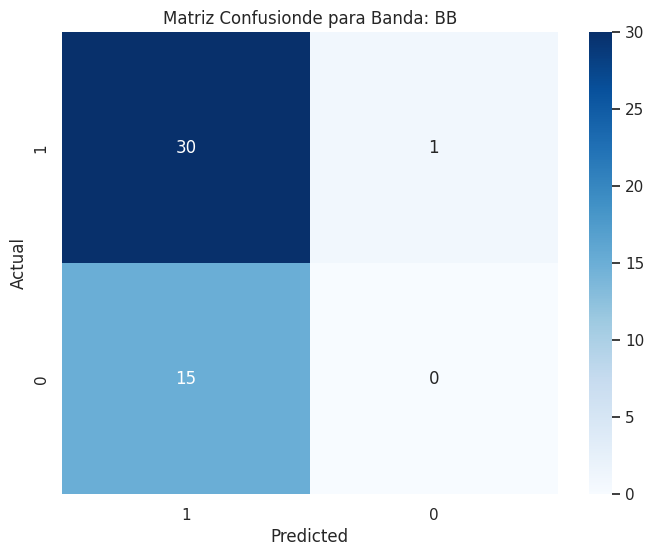

In [111]:

lista_de_bandas = df_total['Banda'].unique()
#display(df_total.loc[df_total['Banda'] == 'AL2'])
lista_de_bandas = lista_de_bandas[:-1] # Excluir 'ALI(1)' de la lista, eliminando el ultimo elemote de la lista
for banda in lista_de_bandas:
    df_banda = df_total[df_total['Banda'] == banda]
    y_banda = df_banda['Real']
    X_banda = df_banda.drop(columns=['Real','Tipo','Condicion','Banda','Participantes','Grupo'])
    X_train_banda, X_test_banda, y_train_banda, y_test_banda = train_test_split(X_banda, y_banda, test_size=0.2)
    
    logistic_model.fit(X_train_banda, y_train_banda)
    y_pred_banda = logistic_model.predict(X_test_banda)
    
    print(f"Banda: {banda}")
    print("Accuracy:", accuracy_score(y_test_banda, y_pred_banda))
    print(f"cross val score: {cross_val_score(logistic_model, X_banda, y_banda, cv=5).mean()}")
    print("\n")
    cm = confusion_matrix(y_test_banda, y_pred_banda)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['1', '0'], yticklabels=['1', '0']) # verificar las etiquetas
    plt.title(f'Matriz Confusionde para Banda: {banda}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

### Hacer modelos de regresion logistica por condicion de los EEG: EX,OA,OC

Condición: OA
Accuracy: 0.5853658536585366
cross val score: 0.502465972401796


Condición: OC
Accuracy: 0.5144927536231884
cross val score: 0.502465972401796


Condición: EX
Accuracy: 0.43137254901960786
cross val score: 0.502465972401796




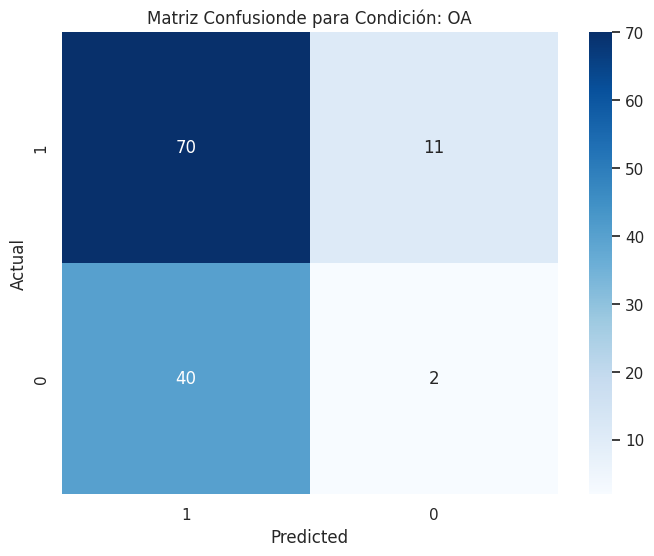

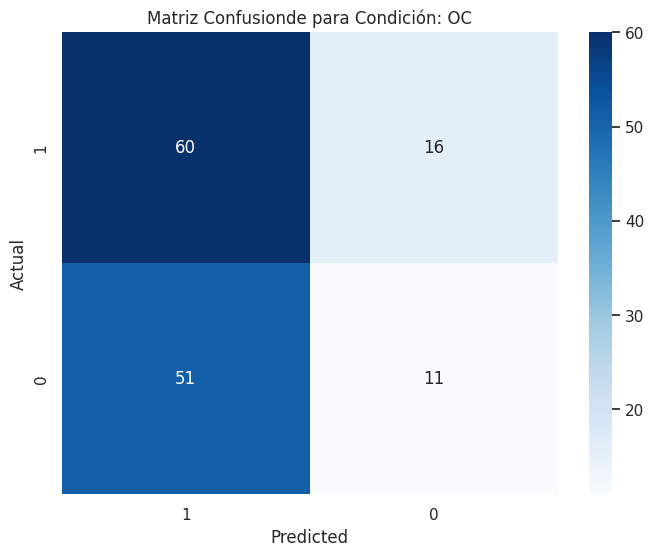

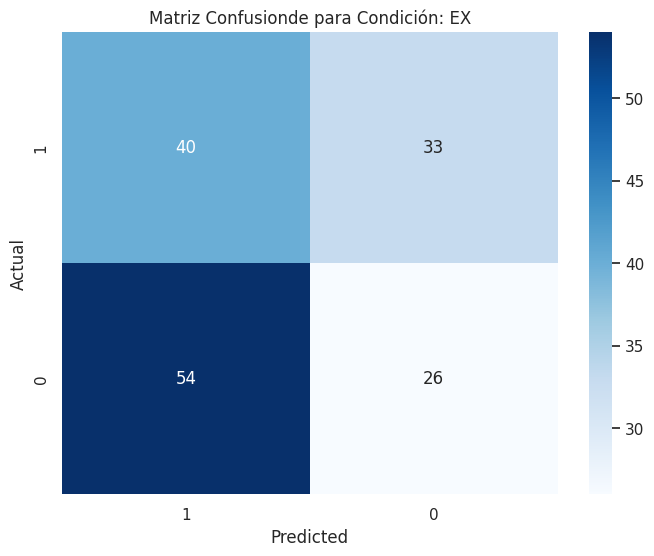

In [112]:

lista_de_condiciones = df_total['Condicion'].unique()
for condicion in lista_de_condiciones:
    df_condicion = df_total[df_total['Condicion'] == condicion]
    y_condicion = df_condicion['Real']
    X_condicion = df_condicion.drop(columns=['Real','Tipo','Condicion','Banda','Participantes','Grupo'])
    X_train_condicion, X_test_condicion, y_train_condicion, y_test_condicion = train_test_split(X_condicion, y_condicion, test_size=0.2)
    
    logistic_model.fit(X_train_condicion, y_train_condicion)
    y_pred_condicion = logistic_model.predict(X_test_condicion)
    
    print(f"Condición: {condicion}")
    print("Accuracy:", accuracy_score(y_test_condicion, y_pred_condicion))
    print(f"cross val score: {cross_val_score(logistic_model, X, y, cv=5).mean()}")

    print("\n")
    cm = confusion_matrix(y_test_condicion, y_pred_condicion)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['1', '0'], yticklabels=['1', '0']) # verificar las etiquetas
    plt.title(f'Matriz Confusionde para Condición: {condicion}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

## Empezar modelos de SVM

##### Empezar por todo junto

Cantidad de parejas reales: 923
Cantidad de parejas random: 1139
Cantidad de parejas totales: 2062
Cantidad de parejas reales en entrenamiento: 716
Cantidad de parejas random en entrenamiento: 933
Cantidad de parejas reales en test: 207
Cantidad de parejas random en test: 206
Exactitud SVM: 0.6319612590799032
Matriz de Confusion SVM:
 [[ 82 124]
 [ 28 179]]


Text(66.25, 0.5, 'Actual')

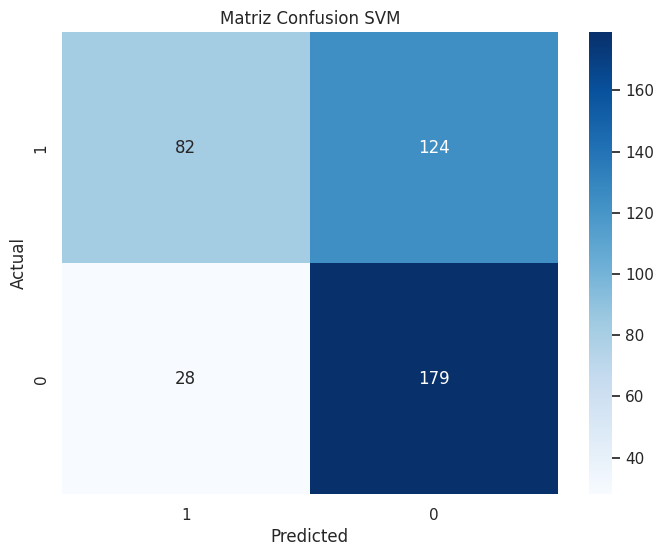

In [133]:
from sklearn.svm import SVC

svm_model = SVC(kernel='poly', degree=2)

y = df_total['Real']
X = df_total.drop(columns=['Real','Tipo','Condicion','Banda','Participantes','Grupo'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

parejas_reales = df_total[df_total['Real'] == 1]
parejas_random = df_total[df_total['Real'] == 0]
print("Cantidad de parejas reales:", len(parejas_reales))
print("Cantidad de parejas random:", len(parejas_random))
print("Cantidad de parejas totales:", len(df_total))
print("Cantidad de parejas reales en entrenamiento:", len(y_train[y_train == 1]))
print("Cantidad de parejas random en entrenamiento:", len(y_train[y_train == 0]))
print("Cantidad de parejas reales en test:", len(y_test[y_test == 1]))
print("Cantidad de parejas random en test:", len(y_test[y_test == 0]))
svm_model.fit(X_train,y_train)

y_pred_svm = svm_model.predict(X_test)
print("Exactitud SVM:", accuracy_score(y_test, y_pred_svm))
print("Matriz de Confusion SVM:\n", confusion_matrix(y_test, y_pred_svm))
# Visualizar la matriz de confusión SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['1', '0'], yticklabels=['1', '0']) # verificar las etiquetas
plt.title('Matriz Confusion SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')


# SOM

Concatenar las bandas para cada sujeto, para que quede solo una fila por participante

In [ ]:
#display(df_total)
lista_de_participantes = df_total['Participantes'].unique()
display(len(lista_de_participantes))
for participantes in lista_de_participantes:
    df_participantes = df_total[df_total['Participantes'] == participantes]
    df_participantes = df_participantes.drop(columns=['Real','Tipo','Condicion','Banda','Participantes','Grupo'])
    

244

20

18

10

8

6

14

14

18

10

8

14

16

12

20

18

10

18

14

12

10

14

20

10

18

20

12

8

18

18

6

10

12

12

14

18

16

22

10

14

12

14

14

18

18

12

12

8

12

4

10

10

10

14

10

20

8

12

12

18

12

16

12

12

10

16

4

6

4

10

16

14

8

12

14

20

12

16

16

14

14

14

6

12

14

14

16

4

14

18

10

6

16

16

12

12

18

4

16

24

18

10

10

10

12

6

8

10

6

14

4

10

6

4

12

20

16

10

16

6

12

10

16

10

18

10

10

10

14

12

6

12

10

8

14

10

10

10

10

4

14

6

22

12

12

14

16

12

8

12

6

16

18

8

10

12

8

8

8

16

14

10

6

10

6

6

10

8

10

16

16

18

14

4

12

8

8

8

8

18

6

8

8

8

4

12

8

8

4

10

6

4

14

4

4

4

36

38

36

36

38

38

38

38

38

36

36

38

38

24

38

28

38

30

40

40

26

40

40

40

40

40

40

40

40

40

38

38

38

38

38

40

40

40

38

40

40

40

40

40

40

40

40

40

30